In [30]:
import re
import pymongo
from pymongo import MongoClient
import json
import pandas as pd
import emoji
import time

### ทำการดึงข้อมูลมาจาก mongodb แล้วมาทำ dataframe

In [2]:
client = MongoClient('localhost',27017)
db = client.reddit_db

In [3]:
db = client['reddit_db']

In [4]:
reddit_data = db.reddit_collection

In [5]:
df = pd.DataFrame(list(reddit_data.find()))

In [6]:
df.head()

,_id,title,score,id,url,comms_num,created,body
0,5e73f2bc5165ff82ce723dbe,200320 'Youth with You' preview w/ Lisa,7,flil6s,https://v.redd.it/lymjwmh5apn41,2,1.584683e+09,
1,5e73f2bc5165ff82ce723dbf,200320 Lisa (IG: adaline.art),16,fli7b5,https://i.redd.it/mcbr26956pn41.jpg,1,1.584682e+09,
2,5e73f2bc5165ff82ce723dc0,200320 petrafcollins IG update with Lisa,40,fldfn8,https://v.redd.it/gkm2indbunn41,2,1.584666e+09,
3,5e73f2bc5165ff82ce723dc1,200319 Lisa IG Update,361,flbcgz,https://i.imgur.com/kfZgNSG.jpg,7,1.584659e+09,
4,5e73f2bc5165ff82ce723dc2,200319 Songkran Super Festival 2020 Is Postponed,26,fl6ozj,https://i.redd.it/f0bvcavtcln41.jpg,4,1.584636e+09,


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 0 to 5977
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      1833 non-null   object        
 1   score      1833 non-null   int64         
 2   id         1833 non-null   object        
 3   url        1833 non-null   object        
 4   comms_num  1833 non-null   int64         
 5   created    1833 non-null   float64       
 6   body       1833 non-null   object        
 7   timestamp  1833 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 128.9+ KB


In [7]:
df.isnull().sum()

_id          0
title        0
score        0
id           0
url          0
comms_num    0
created      0
body         0
dtype: int64

### ทำการสร้างเวลาขึ้นมาใหม่จากการแปลงค่าเวลา

In [8]:
#แปลงเวลา 
import datetime as dt
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [9]:
_timestamp = df["created"].apply(get_date)

In [10]:
df = df.assign(timestamp = _timestamp)

In [11]:
df = df.drop(['_id'], axis=1)

In [12]:
df

,title,score,id,url,comms_num,created,body,timestamp
0,200320 'Youth with You' preview w/ Lisa,7,flil6s,https://v.redd.it/lymjwmh5apn41,2,1.584683e+09,,2020-03-20 12:49:53
1,200320 Lisa (IG: adaline.art),16,fli7b5,https://i.redd.it/mcbr26956pn41.jpg,1,1.584682e+09,,2020-03-20 12:27:37
2,200320 petrafcollins IG update with Lisa,40,fldfn8,https://v.redd.it/gkm2indbunn41,2,1.584666e+09,,2020-03-20 07:59:49
3,200319 Lisa IG Update,361,flbcgz,https://i.imgur.com/kfZgNSG.jpg,7,1.584659e+09,,2020-03-20 05:56:47
4,200319 Songkran Super Festival 2020 Is Postponed,26,fl6ozj,https://i.redd.it/f0bvcavtcln41.jpg,4,1.584636e+09,,2020-03-19 23:37:39
...,...,...,...,...,...,...,...,...
5973,200108- Lisa Digital Painting,349,elz5oo,https://i.redd.it/qbuzalcsgm941.jpg,18,1.578547e+09,,2020-01-09 12:24:23
5974,191220 olens_official IG Update with Jennie,346,ed8vtv,https://v.redd.it/30suqckmvr541,1,1.576870e+09,,2019-12-21 02:19:16
5975,191218 Jennie IG update,352,ecasv5,https://i.redd.it/hr5t34k3bd541.jpg,9,1.576693e+09,,2019-12-19 01:19:16
5976,191031 Lisa IG update,347,dpmx4p,https://i.redd.it/1axtjyeyfvv31.png,9,1.572554e+09,,2019-11-01 03:37:14


### ช่วงการ cleaning อีกรอบนึง
ทำการเช็คค่าซ้ำโดยดูจาก user และ title ที่ซ้ำกันถ้าตรงกันจะ drop ออกไปครับ
เพราะว่าตอนนี้เราตั้งเวลาไว้ให้ทุก 10 - 20 นาทีดึง เลยมีค่าซ้ำกันมากๆ
จาก 5978 สามารถใช้ได้ 1833

In [13]:
df.duplicated(['id', 'title']).sum()

4145

In [14]:
df.drop_duplicates(['id', 'title'], inplace=True)

In [15]:
df

,title,score,id,url,comms_num,created,body,timestamp
0,200320 'Youth with You' preview w/ Lisa,7,flil6s,https://v.redd.it/lymjwmh5apn41,2,1.584683e+09,,2020-03-20 12:49:53
1,200320 Lisa (IG: adaline.art),16,fli7b5,https://i.redd.it/mcbr26956pn41.jpg,1,1.584682e+09,,2020-03-20 12:27:37
2,200320 petrafcollins IG update with Lisa,40,fldfn8,https://v.redd.it/gkm2indbunn41,2,1.584666e+09,,2020-03-20 07:59:49
3,200319 Lisa IG Update,361,flbcgz,https://i.imgur.com/kfZgNSG.jpg,7,1.584659e+09,,2020-03-20 05:56:47
4,200319 Songkran Super Festival 2020 Is Postponed,26,fl6ozj,https://i.redd.it/f0bvcavtcln41.jpg,4,1.584636e+09,,2020-03-19 23:37:39
...,...,...,...,...,...,...,...,...
5973,200108- Lisa Digital Painting,349,elz5oo,https://i.redd.it/qbuzalcsgm941.jpg,18,1.578547e+09,,2020-01-09 12:24:23
5974,191220 olens_official IG Update with Jennie,346,ed8vtv,https://v.redd.it/30suqckmvr541,1,1.576870e+09,,2019-12-21 02:19:16
5975,191218 Jennie IG update,352,ecasv5,https://i.redd.it/hr5t34k3bd541.jpg,9,1.576693e+09,,2019-12-19 01:19:16
5976,191031 Lisa IG update,347,dpmx4p,https://i.redd.it/1axtjyeyfvv31.png,9,1.572554e+09,,2019-11-01 03:37:14


### ช่วงการวิเคราะห์
การตัดคำภาษาอังกฤษเราใช้ module nltk ในการตัดคำเพื่อไปวิเคราะห์ต่อไป

In [16]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt 

In [17]:
def cleanText(text):
    text = str(text)
    text = text.replace("/","")
    text = text.replace('"',"")
    text = text.replace("!","")
    text = text.replace("​","")
    text = text.replace("-","")
    text_split = text.split(" ")
    text = " ".join([c for c in text_split if "@" not in c])
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = " ".join([c for c in text_split if "(" not in c])
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    stop_word = set(stopwords.words('english'))
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)


In [18]:
def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

In [19]:
new_text = []
for txt in df["title"]:
    #new_text = new_text.remove(new_text[0])
    new_text.append(cleanText(txt))

In [20]:
new_text

["200320 /'Youth /You /' /preview /w /Lisa",
 '200320 /Lisa /adaline.art /)',
 '200320 /petrafcollins /IG /update /Lisa',
 '200319 /Lisa /IG /Update',
 '200319 /Songkran /Super /Festival /2020 /Is /Postponed',
 "200320 /'Youth /You /' /ep3 /preview /w /Lisa",
 '200319 /爱奇艺青春有你 /Youth /weibo /update /Lisa',
 '200319 /Lisa',
 '200319 /harpersbazaarkorea /IG /Update /w /Jennie',
 '200319 /Jennie /x /Hera',
 '200319 /Rosé /IG /update',
 '200319 /Rosé /IG /Story /Updates',
 '200319 /Rosé /IG /update',
 '200317 /爱奇艺青春有你 /Youth /weibo /update /Lisa',
 '200317 /Nylon /China /Weibo /Update /Lisa',
 '200318 /AIS_Thailand /Twitter /update /Lisa',
 '200318 /aisinstagram /IG /update /Lisa',
 '200318 /Jennie /X /Calvin /Klein /[ /HighDef /Behind /The /Scenes /]',
 '200318 /Napsé /@ /beo_phalaau /)',
 '200318 /BLACKPINK /x /Samsung /Galaxy /A51 /ELLE /THAILAND',
 '200318 /BLACKPINK /x /Samsung /Galaxy /A51 /ELLE /THAILAND',
 '200318 /BLACKPINK /x /Samsung /Galaxy /A51 /ELLE /THAILAND',
 '200318 /BLAC

ทำการแสดงผลคำที่พบมากที่สุด 10 ลำดับ <br>
จะได้ผลดังนี้ พบว่าส่วนใหญ่จะมีการพูดคุยเกี่ยวกับการที่สมาชิกในวง มีการอัพเดท ig ของตนเอง <br> โดยมี rosé lisa jennie jisoo ถูกพบมากตามลำดับ

In [27]:
vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df = pd.DataFrame(columns = ['word', 'count'])
keyword_df['word'] = vectorizer.get_feature_names()
keyword_df['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df.sort_values(by=['count'], ascending=False).head(10)

,word,count
1326,ig,788
2238,update,521
1898,rosé,328
1495,lisa,321
2239,update,300
1389,jennie,290
566,@,270
1398,jisoo,245
743,blackpink,241
2083,story,230


ทำการสร้าง wordclound ในการทำ visualization เพื่อแสดงถึงสิ่งที่ทำมาให้เป็นภาพ

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


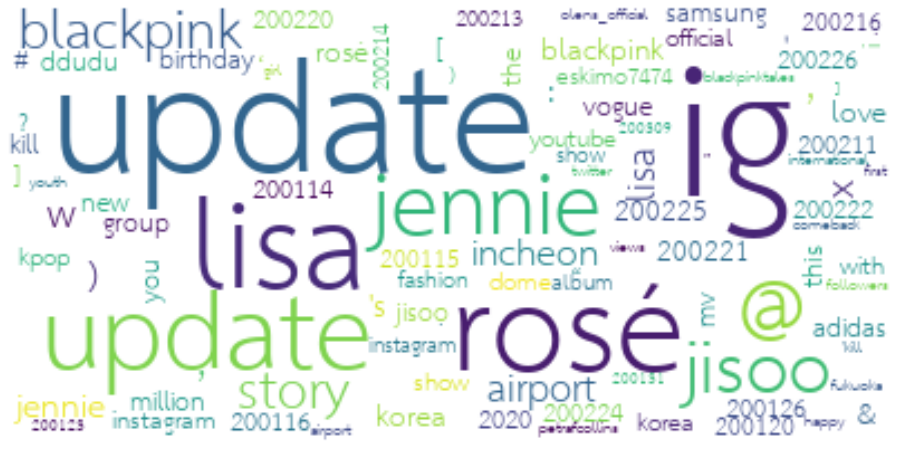

In [22]:
word_dict = {}
for i in range(0,len(keyword_df)):
    word_dict[keyword_df.word[i]]= keyword_df['count'][i]
wordcloud = WordCloud(font_path='/content/THSarabunNew.ttf',background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

visualization แบบเป็น bar plot ที่ทำให้ดูได้ง่าย

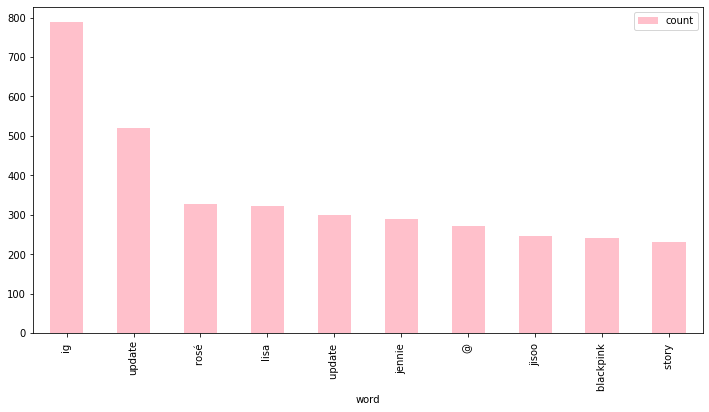

In [23]:
keyword_df.sort_values(by=['count'], ascending=False).set_index('word').head(10).plot(kind="bar",figsize=(12, 6) , color = 'pink')